In [8]:
from dotenv import load_dotenv
load_dotenv('/home/hk-project-pai00028/tum_mhj8661/code/geobreeze/.env')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,nchns,model,mean,std
0,1,dofa,64.066,17.729912
1,1,panopticon,75.600,17.362747
6,3,dofa,83.940,4.762142
7,3,panopticon,92.140,5.013781
9,5,panopticon,94.520,0.614003
8,5,dofa,87.472,1.552585
11,7,panopticon,94.200,1.172604
10,7,dofa,86.100,3.385262
12,9,dofa,87.198,2.327342
13,9,panopticon,94.680,0.563028


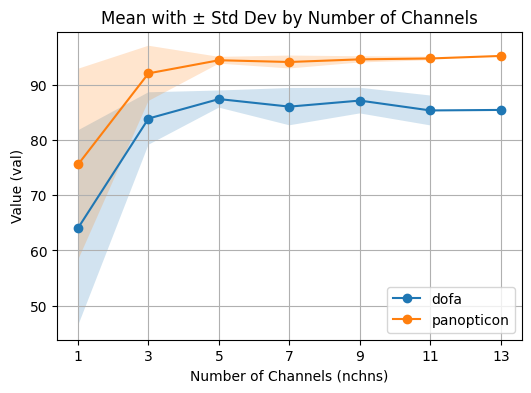

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from geobreeze.collect_results import collect_csv
import os

p = '/hkfs/work/workspace/scratch/tum_mhj8661-panopticon/dino_logs/geobreeze/spec_inv/m-eurosat/'

collect_csv(p)
df = pd.read_csv(os.path.join(p,'results.csv')).drop(columns=['Unnamed: 0'])


df = df[df['metric'] == 'acc_top-1_micro']
df['nchns'] = df['relpath'].apply(lambda x: x.split('/')[1])
df['model'] = df['relpath'].apply(lambda x: x.split('/')[0])


dfplot = df.groupby(['nchns', 'model'])['val'].agg(['mean', 'std']).reset_index()
dfplot['nchns'] = pd.to_numeric(dfplot['nchns'])
dfplot.sort_values('nchns', inplace=True)
display(dfplot)


# Plot mean with ± std as bands
plt.figure(figsize=(6, 4))

for model in dfplot['model'].unique():
    model_data = dfplot[dfplot['model'] == model]
    plt.plot(model_data['nchns'], model_data['mean'], label=model, marker='o')
    plt.fill_between(model_data['nchns'], 
                     model_data['mean'] - model_data['std'], 
                     model_data['mean'] + model_data['std'], 
                     alpha=0.2, )
    
# plt.plot(dfplot['nchns'], dfplot['mean'], label='Mean', marker='o')
# plt.fill_between(dfplot['nchns'], 
#                  dfplot['mean'] - dfplot['std'], 
#                  dfplot['mean'] + dfplot['std'], 
#                  color='gray', alpha=0.2, label='± Std Dev')

plt.title('Mean with ± Std Dev by Number of Channels')
plt.xlabel('Number of Channels (nchns)')
plt.xticks(ticks=range(1, 14, 2))
plt.ylabel('Value (val)')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
dfplot['nchns'].dtype

dtype('int64')

In [64]:
""" generate random channel combinations"""

import numpy as np
import math

all_chns = 13
n_chns = [1,3,5,7,9,11,13]
subsets_per_n_chns = 500

for chn in n_chns:
    already_used = set()
    n_subsets = min(
        subsets_per_n_chns, 
        math.factorial(all_chns) // (math.factorial(all_chns - chn) * math.factorial(chn)))
    for _ in range(n_subsets):
        def sample():
            l = np.random.choice(range(all_chns), chn, replace=False).tolist()
            l = sorted(l)
            return tuple(l)

        chns = sample()
        while chns in already_used:
            chns = sample()
        already_used.add(chns)

        print(f'  \"{chn:2d} {str(list(chns)).replace(" ","")}\"')

  " 1 [2]"
  " 1 [7]"
  " 1 [10]"
  " 1 [0]"
  " 1 [12]"
  " 1 [11]"
  " 1 [5]"
  " 1 [8]"
  " 1 [1]"
  " 1 [6]"
  " 1 [4]"
  " 1 [9]"
  " 1 [3]"
  " 3 [1,2,10]"
  " 3 [0,7,10]"
  " 3 [3,5,7]"
  " 3 [3,6,8]"
  " 3 [4,10,11]"
  " 3 [0,2,10]"
  " 3 [3,9,10]"
  " 3 [2,7,10]"
  " 3 [3,8,10]"
  " 3 [0,3,11]"
  " 3 [4,5,10]"
  " 3 [0,9,12]"
  " 3 [4,6,7]"
  " 3 [5,7,9]"
  " 3 [4,11,12]"
  " 3 [5,8,11]"
  " 3 [2,3,12]"
  " 3 [0,3,12]"
  " 3 [5,7,12]"
  " 3 [0,10,12]"
  " 3 [4,6,8]"
  " 3 [1,3,8]"
  " 3 [0,1,6]"
  " 3 [4,8,12]"
  " 3 [1,5,10]"
  " 3 [4,9,11]"
  " 3 [1,7,8]"
  " 3 [1,9,10]"
  " 3 [7,8,11]"
  " 3 [2,3,9]"
  " 3 [0,6,11]"
  " 3 [2,3,6]"
  " 3 [8,10,11]"
  " 3 [2,7,11]"
  " 3 [7,11,12]"
  " 3 [3,4,9]"
  " 3 [4,9,12]"
  " 3 [2,6,10]"
  " 3 [8,9,12]"
  " 3 [5,9,12]"
  " 3 [6,7,10]"
  " 3 [2,5,10]"
  " 3 [6,10,12]"
  " 3 [2,4,12]"
  " 3 [2,4,8]"
  " 3 [0,1,3]"
  " 3 [6,7,12]"
  " 3 [2,6,9]"
  " 3 [0,8,11]"
  " 3 [3,5,8]"
  " 3 [1,3,4]"
  " 3 [8,10,12]"
  " 3 [6,7,11]"
  " 3 [7,9,11]"

In [ ]:


math.factorial(all_chns) // (math.factorial(all_chns - chn)) * math.factorial(chn)

38775788043632640000

In [1]:
from omegaconf import OmegaConf, open_dict
from geobreeze.factory import make_model

p = '/home/hk-project-pai00028/tum_mhj8661/code/geobreeze/geobreeze/config/model/base/panopticon.yaml'
cfg = OmegaConf.load(p)
with open_dict(cfg):
    cfg.blk_indices = cfg.blk_indices.linear_probe
model = make_model(cfg)

/home/hk-project-pai00028/tum_mhj8661/miniforge3/envs/eval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hk-project-pai00028/tum_mhj8661/miniforge3/envs/eval/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Using cache found in /home/hk-project-pai00028/tum_mhj8661/.cache/torch/hub/panopticon-FM_panopticon_main
/home/hk-project-pai00028/tum_mhj8661/.cache/torch/hub/panopticon-FM_panopticon_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/hk-project-pai00028/tum_mhj8661/.cache/torch/hub/pano

Loaded encoder with blocks [8, 9, 10, 11] blocks and norm LayerNorm((768,), eps=1e-06, elementwise_affine=True)


In [2]:
from geobreeze.factory import make_dataset
from omegaconf import OmegaConf

p = '/home/hk-project-pai00028/tum_mhj8661/code/segm_test.yaml'
cfg = OmegaConf.load(p)

ds = make_dataset(cfg.data.train, normalize=False)
x_dict, mask = ds[0]

/home/hk-project-pai00028/tum_mhj8661/miniforge3/envs/eval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hk-project-pai00028/tum_mhj8661/miniforge3/envs/eval/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


{'_target_': 'K.RandomHorizontalFlip', 'p': 0.5, 'keepdim': True}
{'_target_': 'K.RandomVerticalFlip', 'p': 0.5, 'keepdim': True}
{'_target_': 'K.Resize', 'size': 224, 'keepdim': True}


In [4]:
ds[0][0].keys()

dict_keys(['imgs', 'chn_ids'])

In [5]:
ds.calibrate(band_ids=[1,4,5])

INFO:eval:Subsampled 3/12 bands with ids [1, 4, 5]. Band names are:
  000: 02 - Blue
  001: 05 - Vegetation Red Edge
  002: 06 - Vegetation Red Edge


In [6]:
ds[0][0]['imgs'].shape

torch.Size([3, 224, 224])

In [7]:
ds[0][0]['chn_ids']

tensor([492.9971, 704.0059, 740.5521])

In [2]:
import os

root = '/home/hk-project-pai00028/tum_mhj8661/code/fm-playground/geofm_src/foundation_models/SenPaMAE/responsefunctions'
os.listdir(root)

['rfs_sentinel2_a.npy',
 'rfs_modis_terra.npy',
 'rfs_enmap_recon.npy',
 'rfs_wv23_recon.npy',
 'rfs_sentinel2_b.npy',
 'rfs_sentinel2_a_13b.npy',
 'rfs_landsat.npy',
 'rfs_superdove.npy']

In [5]:
import numpy as np

srfs = {}
for f in os.listdir(root):
    if f.endswith('.npy'):
        data = np.load(os.path.join(root,f))
        srfs[f.removesuffix('.npy')] = data

for f, d in srfs.items():
    print(f, d.shape)

rfs_sentinel2_a (2301, 10)
rfs_modis_terra (2301, 16)
rfs_enmap_recon (2301, 224)
rfs_wv23_recon (2301, 8)
rfs_sentinel2_b (2301, 10)
rfs_sentinel2_a_13b (2301, 13)
rfs_landsat (2301, 7)
rfs_superdove (2301, 8)


In [13]:
f1 = 'rfs_sentinel2_a'
f2 = 'rfs_sentinel2_a_13b'

out = np.ones([srfs[f1].shape[1], srfs[f2].shape[1]]) * -1
for i in range(srfs[f1].shape[1]):
    for j in range(srfs[f2].shape[1]):
        out[i,j] = np.allclose(srfs[f1][:,i], srfs[f2][:,j]) 

print(out)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
ds.calibrate(band_ids= None)

INFO:eval:Subsampled 12/12 bands with ids [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]. Band names are:
  000: 01 - Coastal aerosol
  001: 02 - Blue
  002: 03 - Green
  003: 04 - Red
  004: 05 - Vegetation Red Edge
  005: 06 - Vegetation Red Edge
  006: 07 - Vegetation Red Edge
  007: 08 - NIR
  008: 08A - Vegetation Red Edge
  009: 09 - Water vapour
  010: 11 - SWIR
  011: 12 - SWIR


In [9]:
metainfo = {
    'chn_ids': 'bands.gaussian.mu',
    'gsd': 'bands.GSD',
    'senpamae_srf_name': 'senpamae_srf_name'
}
ds.calibrate(metainfo=metainfo)

ds[0]

INFO:eval:Subsampled 12/12 bands with ids [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]. Band names are:
  000: 01 - Coastal aerosol
  001: 02 - Blue
  002: 03 - Green
  003: 04 - Red
  004: 05 - Vegetation Red Edge
  005: 06 - Vegetation Red Edge
  006: 07 - Vegetation Red Edge
  007: 08 - NIR
  008: 08A - Vegetation Red Edge
  009: 09 - Water vapour
  010: 11 - SWIR
  011: 12 - SWIR


({'imgs': tensor([[[ 326.0000,  326.0000,  318.8251,  ...,  330.0000,  330.0000,
             330.0000],
           [ 326.0000,  326.0000,  318.8251,  ...,  330.0000,  330.0000,
             330.0000],
           [ 326.0000,  326.0000,  318.8251,  ...,  330.0000,  330.0000,
             330.0000],
           ...,
           [ 316.0000,  316.0000,  319.4439,  ...,  282.0000,  282.0000,
             278.0001],
           [ 316.0000,  316.0000,  319.4439,  ...,  282.0000,  282.0000,
             278.0001],
           [ 316.0000,  316.0000,  319.4439,  ...,  282.0000,  282.0000,
             278.0001]],
  
          [[ 394.0000,  390.2780,  374.5471,  ...,  564.1841,  501.8976,
             480.0002],
           [ 403.7175,  376.9169,  374.3644,  ...,  522.4305,  516.6534,
             439.7141],
           [ 410.8700,  396.7253,  372.7646,  ...,  501.2694,  462.4356,
             443.7401],
           ...,
           [ 354.8159,  344.2336,  358.6949,  ...,  350.4633,  322.1515,
          

torch.Size([12, 224, 224])
torch.Size([224, 224])


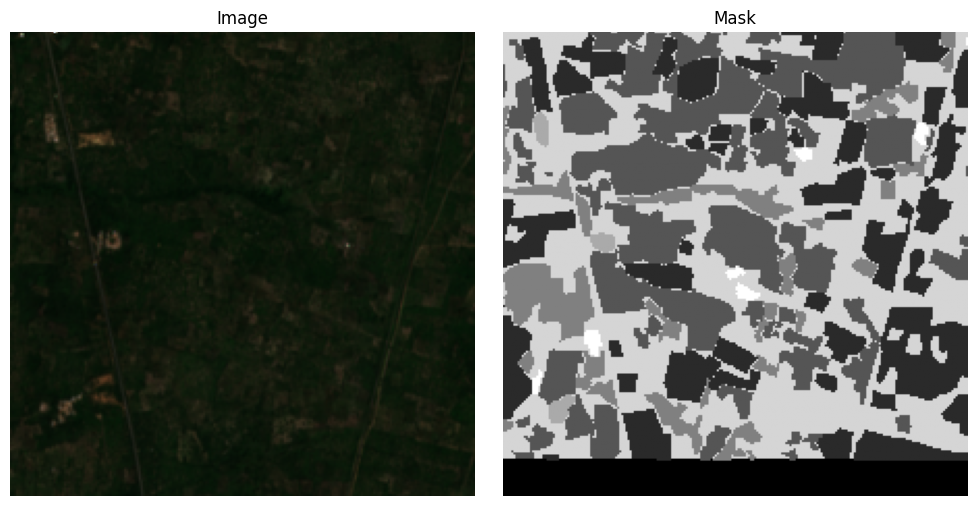

torch.Size([12, 224, 224])
torch.Size([224, 224])


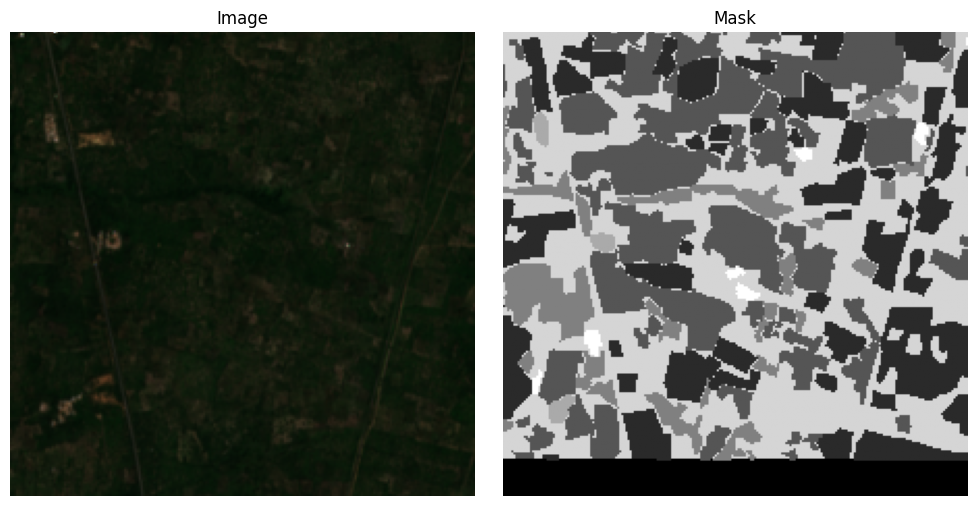

In [16]:
x_dict, mask = ds[100]


img = x_dict['imgs']
mask = mask
print(img.shape)
print(mask.shape)
img = img[[3,2,1]]

img = (img - img.min()) / (img.max() - img.min())

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the image
axes[0].imshow(img.permute(1, 2, 0).numpy())
axes[0].set_title("Image")
axes[0].axis("off")

# Plot the mask
axes[1].imshow(mask.numpy(), cmap="gray")
axes[1].set_title("Mask")
axes[1].axis("off")

plt.tight_layout()
plt.show()



img = x_dict['imgs']
mask = mask
print(img.shape)
print(mask.shape)
img = img[[3,2,1]]

img = (img - img.min()) / (img.max() - img.min())

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the image
axes[0].imshow(img.permute(1, 2, 0).numpy())
axes[0].set_title("Image")
axes[0].axis("off")

# Plot the mask
axes[1].imshow(mask.numpy(), cmap="gray")
axes[1].set_title("Mask")
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [13]:
ds.dataset[0].bands

[Band(info=Band 01 - Coastal aerosol (60.0m resolution), shape=(256, 256), resampled_resolution=0.5m, date=2019-11-15),
 Band(info=Band 02 - Blue (10.0m resolution), shape=(256, 256), resampled_resolution=0.5m, date=2019-11-15),
 Band(info=Band 03 - Green (10.0m resolution), shape=(256, 256), resampled_resolution=0.5m, date=2019-11-15),
 Band(info=Band 04 - Red (10.0m resolution), shape=(256, 256), resampled_resolution=0.5m, date=2019-11-15),
 Band(info=Band 05 - Vegetation Red Edge (20.0m resolution), shape=(256, 256), resampled_resolution=0.5m, date=2019-11-15),
 Band(info=Band 06 - Vegetation Red Edge (20.0m resolution), shape=(256, 256), resampled_resolution=0.5m, date=2019-11-15),
 Band(info=Band 07 - Vegetation Red Edge (20.0m resolution), shape=(256, 256), resampled_resolution=0.5m, date=2019-11-15),
 Band(info=Band 08 - NIR (10.0m resolution), shape=(256, 256), resampled_resolution=0.5m, date=2019-11-15),
 Band(info=Band 08A - Vegetation Red Edge (20.0m resolution), shape=(256,

In [11]:
import kornia as K
import torch

trf = K.augmentation.AugmentationSequential(
    K.augmentation.RandomVerticalFlip(p=1),
    data_keys=['input', 'label'],
)

x = torch.tensor([[1,1],[2,2,]], dtype=torch.float32)
y = torch.tensor([1], dtype=torch.int64)

print(x)

trf(x, y)   

tensor([[1., 1.],
        [2., 2.]])


[tensor([[[[2., 2.],
           [1., 1.]]]]),
 tensor([1])]

In [ ]:
trf.

[<DataKey.IMAGE: 0>, <DataKey.LABEL: 6>]

In [12]:
ds[0]

TypeError: Sequential.forward() takes 2 positional arguments but 3 were given

In [27]:
from geobreeze.factory import make_dataset
from omegaconf import OmegaConf

p = '/hkfs/work/workspace/scratch/tum_mhj8661-panopticon/dino_logs/debug/eval/1/k=None_T=None_norm=None/config.yaml'
cfg = OmegaConf.load(p)

ds = make_dataset(cfg.data.train)

{'_target_': 'K.RandomHorizontalFlip', 'p': 0.5}
{'_target_': 'K.RandomVerticalFlip', 'p': 0.5}
{'_target_': 'K.Resize', 'size': 224, 'keepdim': True}


In [32]:
ds[0][0]['imgs'].shape

torch.Size([1, 3, 224, 224])

In [4]:
sample = ds.dataset[0]

In [6]:
x, band_names = sample.pack_to_3d(
            band_names=None,
            resample=False,
            fill_value=None,
            resample_order=3,)

In [9]:
import torch
x = torch.from_numpy(x.astype("float32")).permute(2, 0, 1)
x.shape

torch.Size([3, 320, 320])

In [10]:
ds.transform

Sequential(
  (0): RandomHorizontalFlip(p=0.5, p_batch=1.0, same_on_batch=False)
  (1): RandomVerticalFlip(p=0.5, p_batch=1.0, same_on_batch=False)
  (2): RandomResizedCrop(scale=[0.8, 1.0], resize_to=(0.75, 1.3333333333333333), output_size=[224, 224], p=1.0, p_batch=1.0, same_on_batch=False, size=[224, 224], resample=bilinear, align_corners=True, cropping_mode=slice, padding_mode=zeros)
)

In [11]:
ds[0]

TypeError: upsample_bilinear2d() received an invalid combination of arguments - got (Tensor, list, bool, NoneType), but expected one of:
 * (Tensor input, tuple of ints output_size, bool align_corners, tuple of floats scale_factors)
      didn't match because some of the arguments have invalid types: (Tensor, !list of [ListConfig, ListConfig]!, bool, !NoneType!)
 * (Tensor input, tuple of ints output_size, bool align_corners, float scales_h, float scales_w, *, Tensor out)


In [14]:
ds.transform[0]

RandomHorizontalFlip(p=0.5, p_batch=1.0, same_on_batch=False)

In [35]:
import kornia.augmentation as K

x = torch.randn(3,224,224)
K.RandomHorizontalFlip(p=0.5, keepdim=True)(x).shape

torch.Size([3, 224, 224])

In [26]:
import kornia.augmentation as K

augm = K.RandomResizedCrop(
    size=[224, 224],
    scale=[0.08, 1.0],
)

augm(torch.randn(3,20,20))

tensor([[[[-0.6115, -0.5512, -0.4908,  ...,  0.0644,  0.0038, -0.0569],
          [-0.6548, -0.5952, -0.5357,  ...,  0.1033,  0.0449, -0.0134],
          [-0.6980, -0.6393, -0.5807,  ...,  0.1421,  0.0861,  0.0301],
          ...,
          [ 1.3174,  1.2933,  1.2693,  ..., -2.0553, -2.0752, -2.0950],
          [ 1.3602,  1.3345,  1.3088,  ..., -2.1427, -2.1649, -2.1871],
          [ 1.4030,  1.3756,  1.3482,  ..., -2.2300, -2.2546, -2.2792]],

         [[ 0.5719,  0.5066,  0.4413,  ..., -0.0731, -0.1169, -0.1608],
          [ 0.5724,  0.5071,  0.4417,  ..., -0.0805, -0.1250, -0.1696],
          [ 0.5729,  0.5075,  0.4422,  ..., -0.0880, -0.1331, -0.1783],
          ...,
          [ 0.0298,  0.0463,  0.0627,  ..., -0.1877, -0.1435, -0.0992],
          [-0.0116,  0.0064,  0.0244,  ..., -0.2128, -0.1665, -0.1202],
          [-0.0530, -0.0335, -0.0140,  ..., -0.2379, -0.1895, -0.1411]],

         [[-0.3400, -0.2405, -0.1410,  ...,  1.3151,  1.4067,  1.4984],
          [-0.3472, -0.2498, -

In [22]:
ds.transform[2](torch.randn(3,20,20))

TypeError: upsample_bilinear2d() received an invalid combination of arguments - got (Tensor, list, bool, NoneType), but expected one of:
 * (Tensor input, tuple of ints output_size, bool align_corners, tuple of floats scale_factors)
      didn't match because some of the arguments have invalid types: (Tensor, !list of [ListConfig, ListConfig]!, bool, !NoneType!)
 * (Tensor input, tuple of ints output_size, bool align_corners, float scales_h, float scales_w, *, Tensor out)


In [25]:
import geobench

task_iter = geobench.task_iterator(benchmark_name='classification_v1.0')

tasks = {task.dataset_name: task for task in task_iter}
task = tasks.get('m-eurosat')

In [3]:
task.get_dataset().normalization_stats()

NameError: name 'task' is not defined

In [10]:
from geobreeze.factory import make_dataset

ds = make_dataset(dict(
    _target_ = 'GeoBenchDataset',
    ds_name = 'm-pv4ger',
    split = 'train',
))
ds[0]

({'imgs': tensor([[[[ 1.5981,  1.5981,  1.5981,  ...,  1.3398,  1.1922,  1.1922],
            [ 1.5981,  1.5981,  1.6351,  ...,  1.1922,  1.0077,  1.0077],
            [ 1.5243,  1.6351,  1.6351,  ...,  1.1922,  1.0077,  1.0077],
            ...,
            [ 1.1738,  1.1738,  1.3214,  ..., -0.2839, -0.2839, -0.2839],
            [ 0.9708,  0.9708,  1.2476,  ..., -0.2839, -0.2839, -0.2839],
            [ 0.9708,  0.9708,  1.2476,  ..., -0.3577, -0.3577, -0.3761]],
  
           [[ 1.5397,  1.5397,  1.5397,  ...,  1.2497,  1.0841,  1.0841],
            [ 1.5397,  1.5397,  1.5604,  ...,  1.0841,  0.8977,  0.8977],
            [ 1.5190,  1.5604,  1.5604,  ...,  1.0841,  0.8977,  0.8977],
            ...,
            [ 1.1462,  1.1462,  1.2912,  ..., -0.1793, -0.1793, -0.1793],
            [ 0.9598,  0.9598,  1.2290,  ..., -0.1793, -0.1793, -0.1793],
            [ 0.9598,  0.9598,  1.2290,  ..., -0.2208, -0.2208, -0.2622]],
  
           [[ 1.5530,  1.5530,  1.5530,  ...,  1.2172,  1.0605

In [13]:
ds.dataset.list_splits()

['train', 'valid', 'test']